In [1]:
import pandas as pd

In [6]:
df=pd.read_csv('/rds/general/user/md2620/home/asthma/Malo/Dataframes/df_midpoint_renamed_merger_done.csv', low_memory=False)

In [7]:
df.head(5)

,Unnamed: 0,Patient,X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum.,X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD30.pg.ml.Luminex.serum.,X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD40L.pg.ml.Luminex.serum.,X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.DPPIV.pg.ml.Luminex.serum.,X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.Galectin.3.pg.ml.Luminex.serum.,X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.IL.18.pg.ml.Luminex.serum.,X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.IL.1alpha.pg.ml.Luminex.serum.,X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.IL.6Ralpha.pg.ml.Luminex.serum.,...,Subset,Trial,Sex,Age,Race,Sputum.._Eosinophils,Blood.Neutrophils_.,Sputum._Neutrophils,cohort,Blood.Eosinophils_.
0,1,A_000,37.57865,42.71014,4716.67119,153216.96978,5953.57559,215.25319,45.49708,11137.48677,...,subset1,UBIOPRED_ADULT,male,59,white_caucasian,0.38,66.00,58.27,Severe,6.00
1,2,A_001,27.72896,87.18486,6804.54264,117791.50419,7104.30764,349.29102,37.46309,11397.40934,...,subset1,UBIOPRED_ADULT,female,32,white_caucasian,NaN,57.30,NaN,Healthy,1.91
2,3,A_002,52.98132,17.46112,6783.31921,50768.02510,7365.22214,224.03564,40.15679,12108.93463,...,subset1,UBIOPRED_ADULT,female,48,white_caucasian,0.00,57.14,16.96,Healthy,7.14
3,4,A_003,42.46127,32.60452,3566.77690,131762.81237,3876.06006,175.14957,35.22613,12682.15856,...,subset1,UBIOPRED_ADULT,male,44,white_caucasian,72.44,80.74,17.32,Severe,1.14
4,5,A_004,54.90668,46.37395,7749.36779,198096.50894,7380.32731,204.72715,31.65717,13938.13469,...,subset1,UBIOPRED_ADULT,female,55,white_caucasian,1.18,53.40,4.72,Severe_Smoker,6.90


In [9]:
#Have an idea of columns in df
df.columns

Index(['Unnamed: 0', 'Patient',
       'X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum.',
       'X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD30.pg.ml.Luminex.serum.',
       'X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD40L.pg.ml.Luminex.serum.',
       'X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.DPPIV.pg.ml.Luminex.serum.',
       'X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.Galectin.3.pg.ml.Luminex.serum.',
       'X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.IL.18.pg.ml.Luminex.serum.',
       'X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.IL.1alpha.pg.ml.Luminex.serum.',
       'X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.IL.6Ralpha.pg.ml.Luminex.serum.',
       ...
       'Subset', '

Text(0.5, 1.02, 'kproto clusters size')

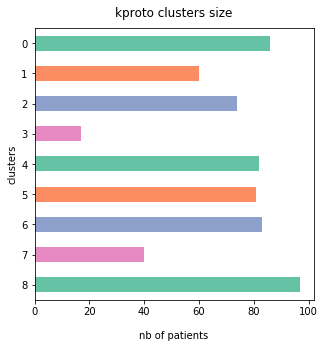

In [13]:
# clusters size
from matplotlib import pyplot as plt
df['cluster'].value_counts(sort=False).plot(
    kind='barh',
    color=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'],
    figsize=(5, 5)).invert_yaxis()
plt.xlabel('nb of patients', labelpad=14)
plt.ylabel('clusters')
plt.title('kproto clusters size', y=1.02)
#import os
#os.chdir("/rds/general/user/md2620/home/asthma/Malo/")
#plt.savefig('k_proto_cluster_size_08+.png')

In [14]:
df_sub = df[["cluster", "cohort"]]

In [15]:
type(df_sub)

pandas.core.frame.DataFrame

In [43]:
df_grouped = df_sub.groupby(['cohort','cluster']).size().sort_values(ascending=True)

In [28]:
df_grouped_2 = df_sub.groupby(['cohort']).size()

Text(0.5, 1.02, 'kproto clusters size per asthma severity')

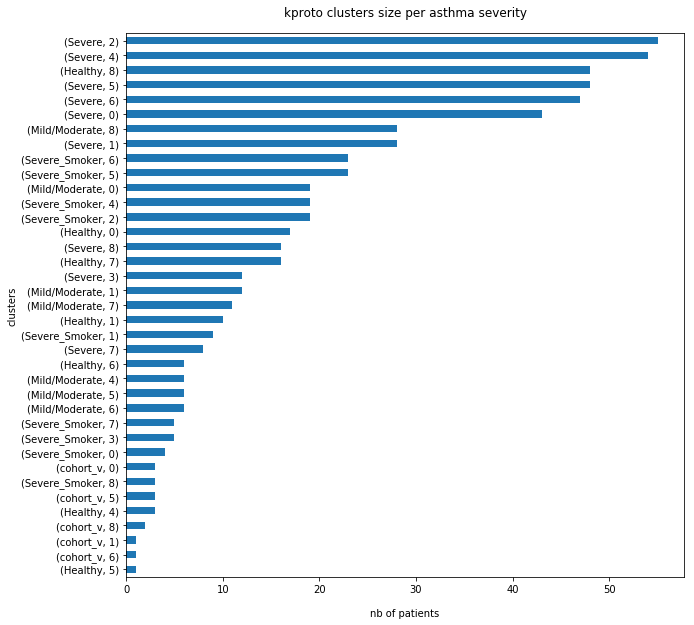

In [88]:
df_grouped.plot(kind="barh",figsize = (10,10))
plt.xlabel('nb of patients', labelpad=14)
plt.ylabel('clusters')
plt.title('kproto clusters size per asthma severity', y=1.02)

In [85]:
combo = pd.crosstab(df_sub['cluster'], df_sub['cohort'])

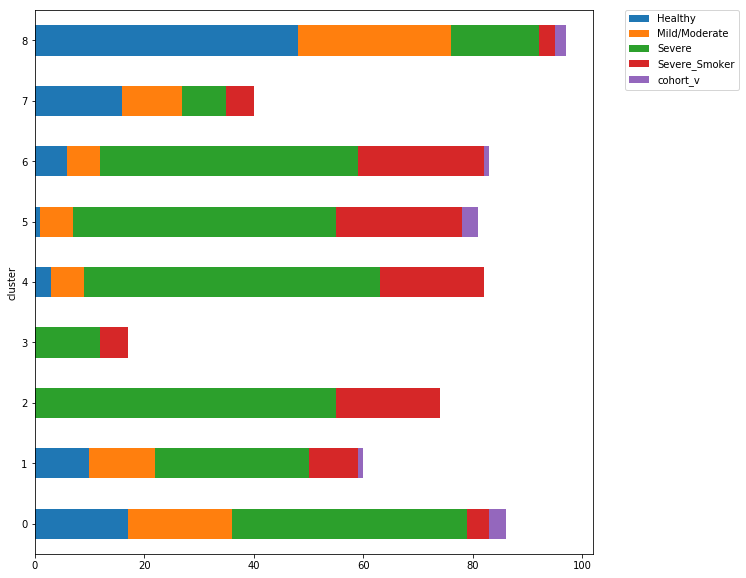

In [94]:
combo.plot(kind='barh', figsize = (10,10), stacked=True)
plt.legend(combo.columns,bbox_to_anchor=(1.05,1.01))

In [63]:
combo_percentage = combo.div(combo.sum(axis=1),axis=0)*100

In [87]:
combo_percentage.values

array([[19.76744186, 22.09302326, 50.        ,  4.65116279,  3.48837209],
       [16.66666667, 20.        , 46.66666667, 15.        ,  1.66666667],
       [ 0.        ,  0.        , 74.32432432, 25.67567568,  0.        ],
       [ 0.        ,  0.        , 70.58823529, 29.41176471,  0.        ],
       [ 3.65853659,  7.31707317, 65.85365854, 23.17073171,  0.        ],
       [ 1.2345679 ,  7.40740741, 59.25925926, 28.39506173,  3.7037037 ],
       [ 7.22891566,  7.22891566, 56.62650602, 27.71084337,  1.20481928],
       [40.        , 27.5       , 20.        , 12.5       ,  0.        ],
       [49.48453608, 28.86597938, 16.49484536,  3.09278351,  2.06185567]])

In [65]:
combo

cohort,Healthy,Mild/Moderate,Severe,Severe_Smoker,cohort_v
cluster,,,,,
0,17,19,43,4,3
1,10,12,28,9,1
2,0,0,55,19,0
3,0,0,12,5,0
4,3,6,54,19,0
5,1,6,48,23,3
6,6,6,47,23,1
7,16,11,8,5,0
8,48,28,16,3,2


In [75]:
combo_percentage.dtypes

cohort
Healthy          float64
Mild/Moderate    float64
Severe           float64
Severe_Smoker    float64
cohort_v         float64
dtype: object

In [78]:
combo_percentage

cohort,Healthy,Mild/Moderate,Severe,Severe_Smoker,cohort_v
cluster,,,,,
0,19.767442,22.093023,50.000000,4.651163,3.488372
1,16.666667,20.000000,46.666667,15.000000,1.666667
2,0.000000,0.000000,74.324324,25.675676,0.000000
3,0.000000,0.000000,70.588235,29.411765,0.000000
4,3.658537,7.317073,65.853659,23.170732,0.000000
5,1.234568,7.407407,59.259259,28.395062,3.703704
6,7.228916,7.228916,56.626506,27.710843,1.204819
7,40.000000,27.500000,20.000000,12.500000,0.000000
8,49.484536,28.865979,16.494845,3.092784,2.061856


Text(0.5, 1.0, 'Percentage of each form of asthma according to cluster belonging')

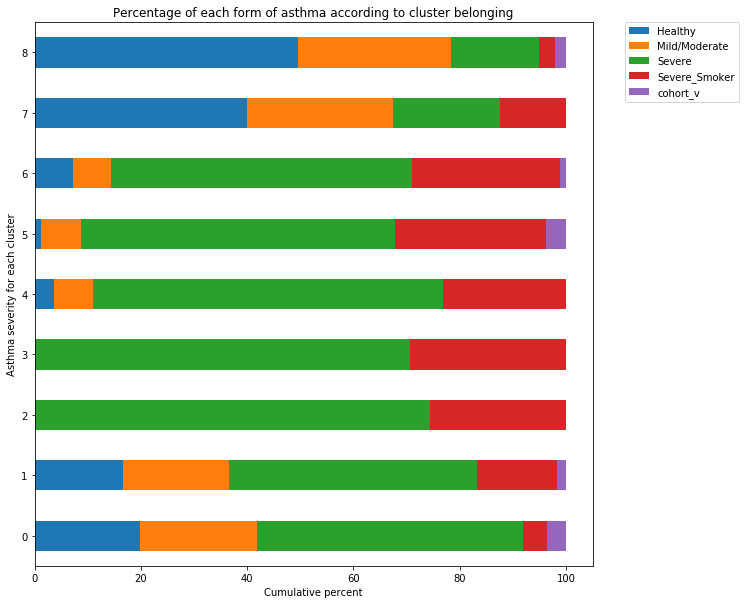

In [113]:
combo_percentage.plot(kind='barh', figsize = (10,10), stacked=True,mark_right=True)
plt.legend(combo_percentage.columns,bbox_to_anchor=(1.05,1.01))
plt.xlabel('Cumulative percent')
plt.ylabel('Asthma severity for each cluster')
plt.title('Percentage of each form of asthma according to cluster belonging')
#for n in combo_percentage:
    #for i, (cs, ab, pc) in enumerate(zip(combo.iloc[:, 0:].cumsum(1)[n], 
                                         #combo[n], combo_percentage[n])):
        #plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', va='center', ha='center',
                   #rotation = 0, fontsize = 8)
#plt.tight_layout()